<b>We first create the Classification tree using the data given in the question. That will solve Question 4. After that we test the classification tree on random data and return if the the driver is at risk or no. This will solve Q5. </b>

In [1]:
#Importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree

In [2]:
#Inputing the test data.
age=np.array([23,17,43,68,32,20])
car_type=np.array(["family","sports","sports","family","truck","family"])
risk=np.array(["High","High","High","Low","Low","High"])

attributes=[age,car_type,risk]
df=pd.DataFrame(attributes).transpose()
df.columns=["Age","Car_type","Risk"]
df = pd.get_dummies(df, columns = ['Car_type'])

dummy1=df.copy()
dummy1.drop("Risk",axis=1,inplace=True)
X=dummy1
y=risk

Decision Tree Classifier Created


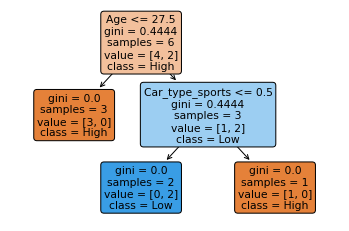

In [3]:
dtree=DecisionTreeClassifier()
dtree.fit(X,y)
print("Decision Tree Classifier Created")
dec_tree = plot_tree(decision_tree=dtree, feature_names = X.columns, 
                     class_names =["High", "Low"] , filled = True , precision = 4, rounded = True)

<b> Question 5 is from the next cell. I have used 100 random samples, since the number of samples was not mentioned.</b>

In [4]:
age=np.random.randint(17,70,size=100)
car_type=np.random.choice(["family", "sports", "truck"], size=100)

attributes=[age,car_type]
df2=pd.DataFrame(attributes).transpose()
df2.columns=["Age","Car_type"]
df2= pd.get_dummies(df2, columns = ['Car_type'])
df2.head()
y_pred=dtree.predict(df2)
final_answer=df2.copy()
final_answer["Risk"]=y_pred
final_answer.head()




,Age,Car_type_family,Car_type_sports,Car_type_truck,Risk
0,31,0,1,0,High
1,23,0,0,1,High
2,59,0,0,1,Low
3,18,0,1,0,High
4,23,0,1,0,High


<b>The final_answer dataframe gives the Risk of each driver in the random sample size of 100 drivers, derived using the classification tree prepared in Q4.</b>